## 백준 1195 킥다운
0607
https://www.acmicpc.net/problem/1195

조건정리
- 최소값: 두 기어 중 긴 기어 길이
- 최대값: 두 기어 합


- 조건: 긴 기어 앞 문자 길이 +1씩, 짧은기어 뒷 문자 길이 +1씩 해서 정수로 바꾼다음 더해서 자리수 중 4 나오면 패스, 4 안나왔으면 중간값 저장
- 중간값: 겹친(for문 진행 정도) 길이만큼 최대값에서 뺴기

다른 사람 풀이

In [ ]:
import sys # 코랩 불가

inp = sys.stdin.readline
gear_1 = inp().strip()
gear_2 = [False for _ in range(len(gear_1))] + [i == "2" for i in inp().strip()] + [False for _ in range(len(gear_1))]

n1 = len(gear_1)
n2 = len(gear_2) - 2 * n1

Yee = []
for i in range(n1):
    if gear_1[i] == "2":
        Yee.append(i)

minV = 1e9
for i in range(n1 + n2 + 1):
    fit = True
    for y in Yee:
        if gear_2[y + i]:
            fit = False
            break
    if fit:
        minV = min(minV, max(n1 + n2, n1 + i) - min(i, n1))
print(minV)

## 백준 15685 드래곤커브
0612 https://www.acmicpc.net/problem/15685

다른 사람 풀이

In [ ]:
import sys

def make_dp(idx):
    while idx + 1 != len(dp):
        dp.append(dp[-1] + [(direction + 1) % 4 for direction in dp[-1][-1::-1]])

def make_dragon(targetY, targetX, d, idx):
    if len(dp) <= idx:
        make_dp(idx)
    grid[targetY][targetX] = 1
    for direction in dp[idx]:
        direction = (direction + d) % 4
        targetY += dy[direction]
        targetX += dx[direction]
        grid[targetY][targetX] = 1

inp = sys.stdin.readline
n = int(inp().strip())
dp = [[0]]
dx = [1, 0, -1, 0]
dy = [0, -1, 0, 1]
grid = [[False for _ in range(101)] for _ in range(101)]
for _ in range(n):
    x, y, d, g = map(int, inp().split())
    make_dragon(y, x, d , g)

res = 0
for i in range(100):
    for j in range(100):
        if grid[i][j] and grid[i + 1][j] and grid[i][j + 1] and grid[i + 1][j + 1]:
            res += 1
print(res)

https://tmdrl5779.tistory.com/146 : 짧은 코드

좌표를 저장하는게 아닌 진행 방향만 저장하는 방식 - 깔끔

In [ ]:
n = int(input())

graph = [[0] * 101 for _ in range(101)]
dx = [0, -1, 0, 1]
dy = [1, 0, -1, 0]

for i in range(n):

    y, x, d, g = map(int, input().split(' '))
    graph[x][y] = 1

    # 커브 리스트 만들기
    curve = [d]
    for j in range(g):
        for k in range(len(curve) - 1, -1, -1):
            curve.append((curve[k] + 1) % 4)

    # 드래곤 커브 만들기
    for j in range(len(curve)):
        x += dx[curve[j]]
        y += dy[curve[j]]
        if x < 0 or x >= 101 or y < 0 or y >= 101:
            continue

        graph[x][y] = 1

answer = 0
for i in range(100):
    for j in range(100):
        if graph[i][j] == 1 and graph[i + 1][j] == 1 and graph[i][j + 1] == 1 and graph[i + 1][j + 1] == 1:
            answer += 1

print(answer)

## 백준 17140 이차원 배열과 연산
0613
https://www.acmicpc.net/problem/17140

다른 사람 풀이

In [ ]:
import sys
from collections import Counter

inp = sys.stdin.readline

r, c, k = map(int, inp().split())
grid = [list(map(int, inp().split())) for _ in range(3)]

def R():
    maxL = 0
    for i in range(len(grid)):
        tmp = [j for j in grid[i] if j != 0]
        tmp = sorted(Counter(tmp).items(), key = lambda x: (x[1], x[0]))
        grid[i] = []
        for a, b in tmp:
            grid[i].append(a)
            grid[i].append(b)
        maxL = max(maxL, len(grid[i]))
    for i in range(len(grid)):
        while len(grid[i]) != maxL:
            grid[i].append(0)
            grid[i].append(0)

for cnt in range(101):
    try:
        if grid[r - 1][c - 1] == k:
            print(cnt)
            break
    except:
        pass
    if len(grid) >= len(grid[0]):
        R()
    else:
        grid = list(zip(*grid))
        R()
        grid = list(zip(*grid))
else:
    print(-1)

## 백준 봄버맨
아래랑 두 문제 85분 제한
0614 https://www.acmicpc.net/problem/16918

## 백준 치즈
0614_2 https://www.acmicpc.net/problem/2636

# 프로그래머스 미로탈출
0616 https://school.programmers.co.kr/learn/courses/30/lessons/159993?language=python3

https://velog.io/@ggb05224/%ED%94%84%EB%A1%9C%EA%B7%B8%EB%9E%98%EB%A8%B8%EC%8A%A4-%EB%AF%B8%EB%A1%9C-%ED%83%88%EC%B6%9C-python

# 프로그래머스 무인도 여행

0620 https://school.programmers.co.kr/learn/courses/30/lessons/154540

BFS 너비 우선 탐색



# 네부캠 8기 기출
https://blog.naver.com/boostcamp_official/223085597916
0620

## Q1
자연수가 들어있는 배열 arr가 매개변수로 주어집니다. 배열 arr안의 숫자들 중에서 앞에 있는 숫자들부터 뒤에 중복되어 나타나는 숫자들 중복 횟수를 계산해서 배열로 return 하도록 solution 함수를 완성해주세요. 만약 중복되는 숫자가 없다면 배열에 -1을 채워서 return 하세요.

In [ ]:
a = {1:1, 2:5, 3:2}

In [ ]:
a[4] = 5
a

{1: 1, 2: 5, 3: 2, 4: 5}

In [ ]:
a[3] += 1
a

{1: 1, 2: 5, 3: 3, 4: 5}

In [ ]:
b = {}
b[1] = 1
b

{1: 1}

### sol1 중복 되는것만 리스트에 담기 : 실패

In [ ]:
arr = list(input().split())

def solution(arr):
    # arr2 = [] # 나온 arr : 생각해보니 if arr[i] in arr[:i]로 해도 될 듯
    count = {}
    result = []
    for i in range(1, len(arr)):
        print(i, arr[i])
        if arr[i] in arr[:i]: # 이전에 나온 숫자면
            if arr[i] in count.keys(): # 카운트된적 있으면
                count[arr[i]] += 1 # 카운트값 +1
                print('01',i, '/', arr[i], count)

            else: # 카운트된적은 없으면
                count[arr[i]] = 2 # 중복값 2 카운트
                print('01',i, '/', arr[i], count) # 여기선 카운트 dict 멀쩡한데..


    # result = list(count.values())

    return count # 왜 리턴하면 이상할까

solution(arr)
print(count)

3 2 4 4 2 5 2 5 5
1 2
2 4
3 4
01 3 / 4 {'4': 2}
4 2
01 4 / 2 {'4': 2, '2': 2}
5 5
6 2
01 6 / 2 {'4': 2, '2': 3}
7 5
01 7 / 5 {'4': 2, '2': 3, '5': 2}
8 5
01 8 / 5 {'4': 2, '2': 3, '5': 3}
{'2': 2, '3': 3}


In [ ]:
[0]*3

[0, 0, 0]

In [ ]:
c = {[1,2,3]:[4,5,6]}

In [ ]:
{key: value for key, value in zip(arr, [0]*len(arr))}

{'3': 0, '2': 0, '4': 0, '5': 0}

In [ ]:
{key: value for key, value in zip([1,2], [3,4])}

{1: 3, 2: 4}

### sol2 전부 카운트하고 2이상인 것만 반환

In [ ]:
arr = list(input().split())

def solution(arr):
    # 리턴하지 않으면 지역변수
    count = {key: value for key, value in zip(arr, [0]*len(arr))}  # key는 char로 저장됨
    result = []

    for i in range(len(arr)):
        count[arr[i]] += 1 # 카운트값 +1
    print('count', count)

    clist = list(map(int, count.values()))
    print(clist)

    result = [x for x in clist if x >= 2]
    # list(filter(lambda x: x >= 2, clist))

    # 인덱스 i 이용, 리스트 컴프리헨션 이용 X
    # for i in range(len(clist)):
    #     if clist[i] >= 2:
    #         result.append(clist[i])
    # #        print('result', i, result)

    return result

solution(arr)

1 4 2 7 3 3 1 1
count {'1': 3, '4': 1, '2': 1, '7': 1, '3': 2}
[3, 1, 1, 1, 2]


[3, 2]

In [ ]:
count = {'1': 1, '5': 1, '6': 2, '7': 1, '2': 2, '3': 1}

In [ ]:
count.values()

dict_values([1, 1, 2, 1, 2, 1])

In [ ]:
type(count.values())

dict_values

In [ ]:
c = [x for x in [1,2,3] if x >= 2]
c

[2, 3]

In [ ]:
# gpt 코드 : 틀림
def solution(arr):
    counter = {}
    result = []

    # 배열 arr을 순회하며 각 숫자의 중복 횟수를 카운트
    for num in arr:
        if num in counter:
            counter[num] += 1
        else:
            counter[num] = 1

    # 중복된 숫자가 있는지 검사하고 중복 횟수를 배열에 추가
    has_duplicates = False
    for num in arr:
        if counter[num] > 1:
            result.append(counter[num])
            has_duplicates = True
        else:
            result.append(-1)

    # 중복된 숫자가 없으면 -1을 배열에 추가
    if not has_duplicates:
        result.append(-1)

    return result

arr = [1, 2, 3, 2, 6, 2, 3, 5]
result = solution(arr)
print(result)

[-1, 3, 2, 3, -1, 3, 2, -1]


In [ ]:
count

{'2': 2, '3': 3}

In [ ]:
'3' in count.keys()

True

In [ ]:
arr = list(input().split())

count = {}
result = []

for i in range(1, len(arr)):
    print('시작i', i)
    if arr[i] in arr[:i]:
        if arr[i] in count.keys():
            count[arr[i]] += 1
            print('01',i, '/', arr[i], count)
        else:
            count[arr[i]] = 2
            print('02',i, '/',arr[i], count)
    print('끝i', i)

result = list(count.values())

1 2 2 3 3 3
시작i 1
끝i 1
시작i 2
02 2 / 2 {'2': 2}
끝i 2
시작i 3
끝i 3
시작i 4
02 4 / 3 {'2': 2, '3': 2}
끝i 4
시작i 5
01 5 / 3 {'2': 2, '3': 3}
끝i 5


## Q2
여러분들은 새로운 컴퓨터를 만들고 8바이트 단위로 관리하는 타입별 메모리 관리 방식을 시뮬레이션하려고 합니다.

지원하는 타입별 크기는 다음과 같습니다.

​

BOOL 1바이트

SHORT 2바이트

FLOAT 4바이트

INT 8바이트

LONG 16바이트

​

매개변수 param0에 타입들을 입력한 순서대로 메모리를 할당한 결과를 8바이트 단위로 구분해서 return해주는 solution 함수를 작성하세요.

단, BOOL을 제외한 8바이트보다 작은 타입들이 연속될 경우에는 사이에 패딩(.)을 붙여야 합니다. SHORT는 2배수, FLOAT는 4배수가 되도록 메모리를 할당해야 합니다.​

​

예를 들어 BOOL 타입 이후에 BOOL 타입은 바로 붙어서 할당할 수 있습니다.

 "BOOL", "BOOL" → "##......"

​

그렇지만 BOOL 타입 이후에 SHORT, FLOAT를 할당하기 위해서는 각각 1개, 3개 패딩을 붙여야 합니다.

"BOOL", "SHORT" → "#.##...."

"BOOL", "FLOAT" → "#...####"

"BOOL", "SHORT", "FLOAT" → "#.######"

​

BOOL 타입 이후에 크기가 8바이트 이상인 타입은 7개 패딩을 붙여야 합니다.

"BOOL", "INT" → "#.......,########"

​

BOOL과 마찬가지로 8바이트보다 작은 SHORT, FLOAT도 뒤에 패딩을 붙여야 합니다.

"SHORT", "BOOL" → "###....."

"FLOAT", "SHORT" → "######.."

​

​

제한 사항

입력 타입은 1개 이상, 100개 이하까지만 가능합니다.

출력하는 메모리 최대 크기는 128바이트를 기준으로 동작합니다. 따라서 128바이트보다 큰 메모리 할당은 불가능합니다.

만약 타입 하나라도 더 이상 할당할 수 없는 경우는 "HALT"를 리턴합니다.

​

In [ ]:
param0 = list(input().split())

type0 = {
    'BOOL': '#'
    'SHORT': '##'
    'FLOAT': '####'
    'INT': '########'
    'LONG': '########,########'
}

def solution(param0):
    for i in len(param0):
        mem


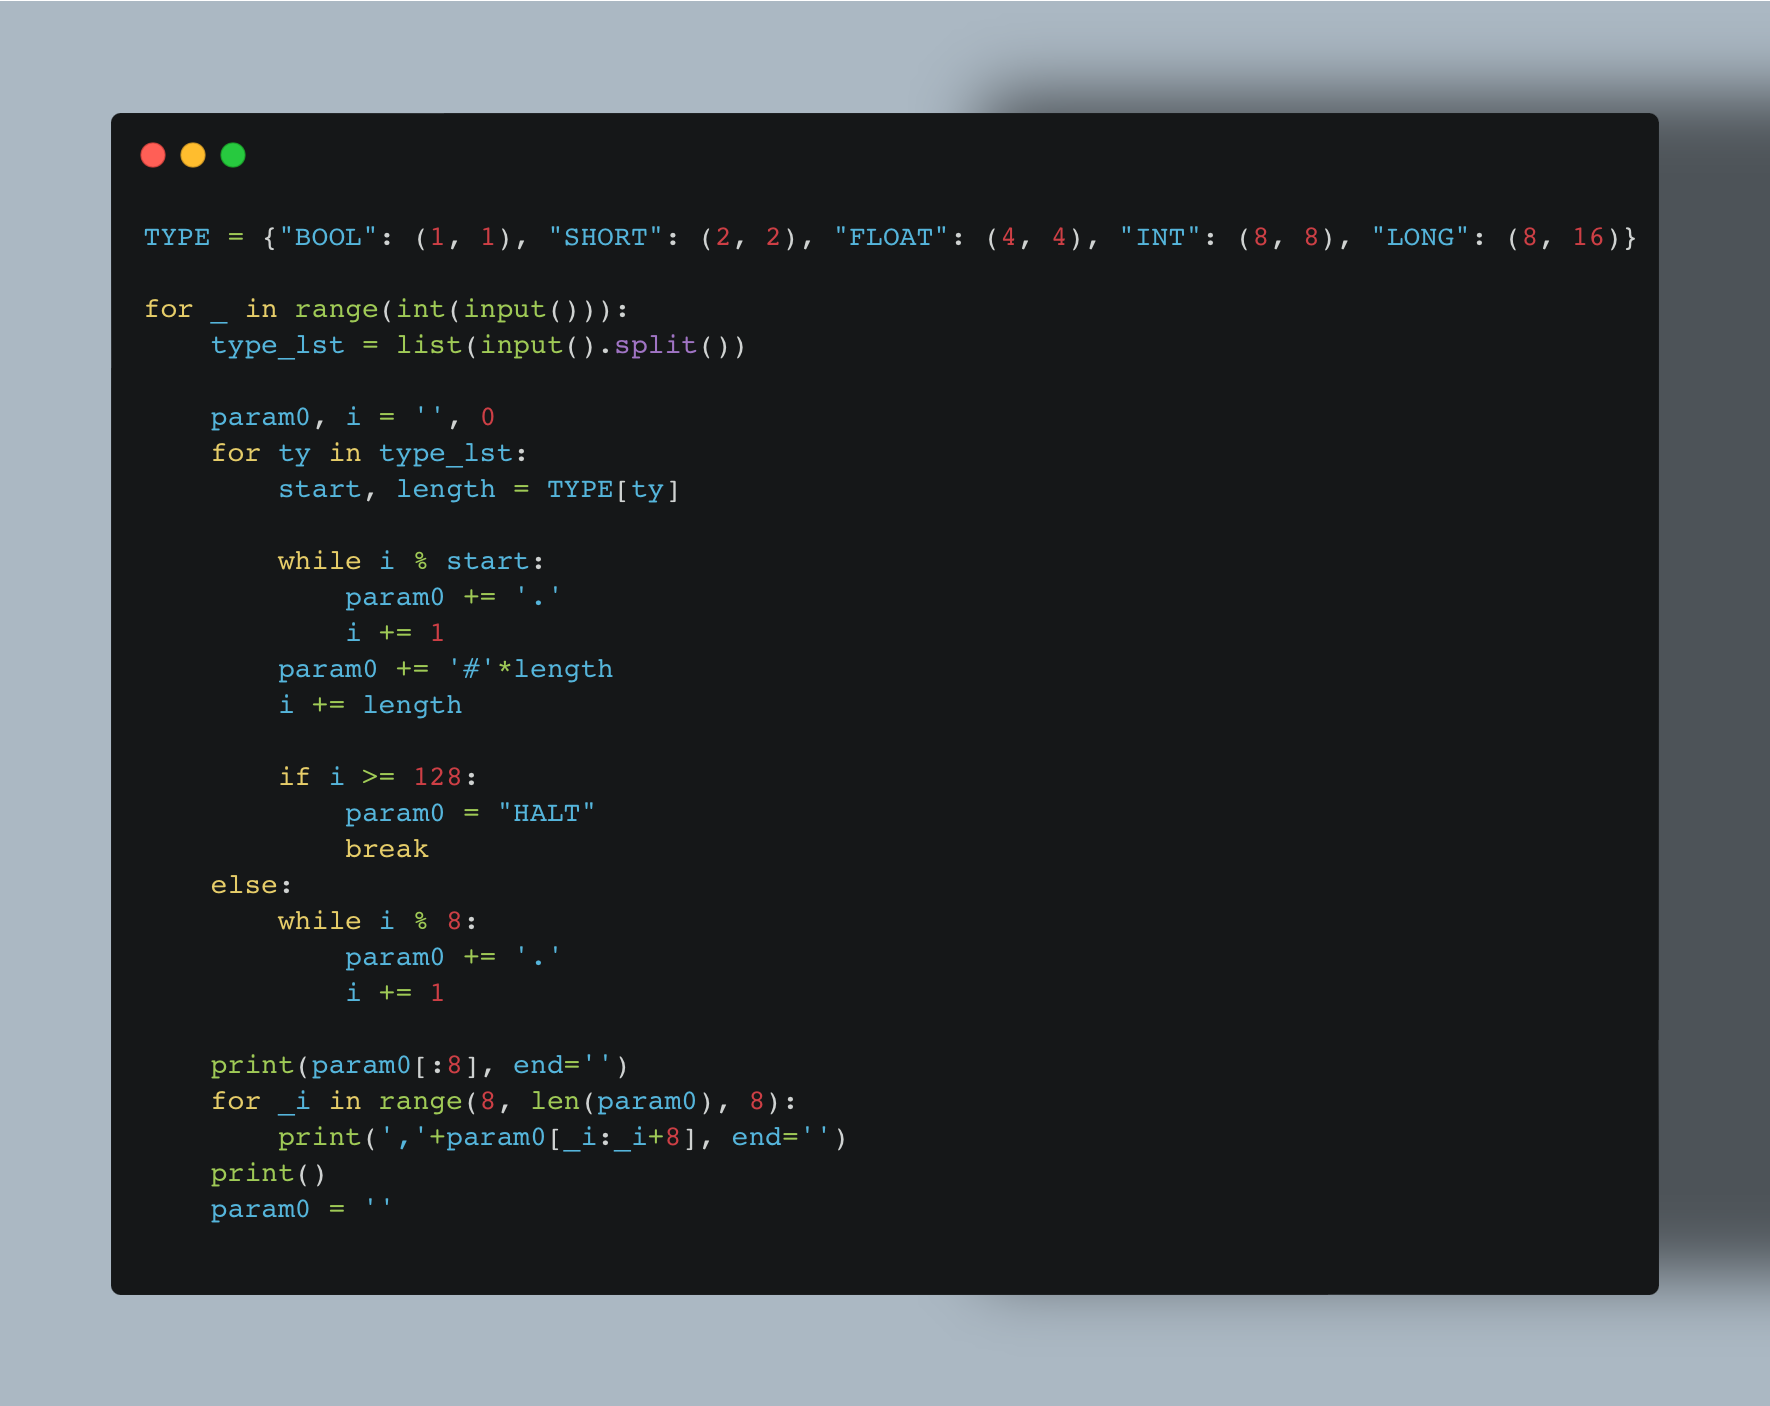

In [ ]:
# BOOL-1, SHORT-2, FLOAT-4, INT-8, LONG-16

def solution(arr):
    answer = ""
    tmp = ""
    for t in arr:
        if t == "BOOL":
            tmp += "#"
            if len(tmp) == 8:
                answer += tmp + ","
                tmp = ""
        elif t == "SHORT":
            n, mod = divmod(8-len(tmp), 2)
            if n > 0:
                tmp += mod*"." + "##"
                if len(tmp) == 8:
                    answer += tmp + ","
                    tmp = ""
            else:
                tmp += (8-len(tmp))*"."
                answer += tmp
                tmp = "##"
        elif t == "FLOAT":
            n, mod = divmod((8-len(tmp)), 4)
            if n > 0:
                tmp += mod*"." + "####"
                if len(tmp) == 8:
                    answer += tmp + ","
                    tmp = ""
            else:
                tmp += (8-len(tmp))*"."
                answer += "tmp"
                tmp = "####"
        elif t == 'INT':
            if tmp != "":
                answer += tmp + (8-len(tmp))*"." + ","
                tmp = ""
            answer += "#"*8 + ","

        elif t == "LONG":
            if tmp != "":
                answer += tmp + (8-len(tmp))*"." + ","
                tmp = ""
            answer += "#"*8 + "," + "#"*8 + ","

        if len(answer) > 128:
            return "HALT"

    if tmp != "":
        tmp += (8-len(tmp))*"."
        answer += tmp
    else:
        answer = answer[:-1]

    return answer if len(answer) <= 128 else "HALT"


print(solution(["INT", "INT", "BOOL", "SHORT", "LONG"])

      == "########,########,#.##….,########,########")

print(solution(["INT", "SHORT", "FLOAT", "INT", "BOOL"])
      == "########,##..####,########,#…….")

print(solution(["FLOAT", "SHORT", "BOOL", "BOOL", "BOOL", "INT"])
      == "########,#…….,########")

print(solution(["BOOL", "LONG", "SHORT", "LONG", "BOOL", "LONG", "BOOL", "LONG", "SHORT", "LONG", "LONG"]
               ) == "HALT")